In [237]:
import numpy as np
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

# Download data 

In [238]:
dataset = pd.read_csv('Credit_card.csv')
dataset = dataset.fillna(dataset.mean())
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Plots

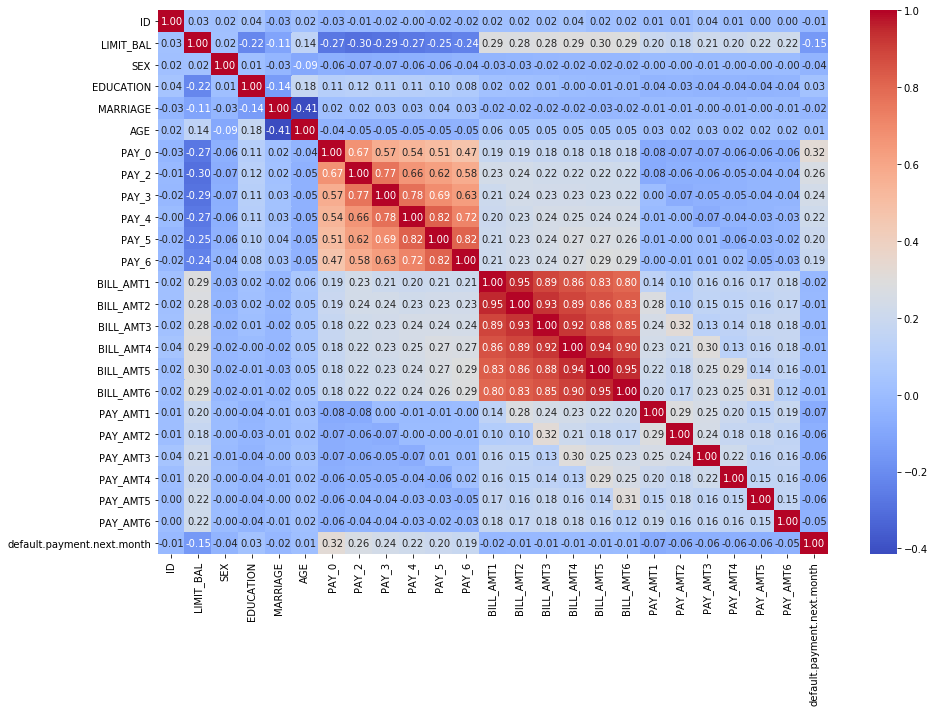

In [239]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

In [240]:
#columns = ['ID','SEX','EDUCATION','MARRIAGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'] 
columns = ['ID']

In [241]:
dataset.rename(columns={'default.payment.next.month': 'Type'}, inplace=True)

In [242]:
dataset = dataset.drop(columns, axis=1) 

In [243]:
dataset = dataset.iloc[:600]

In [244]:
dataset['Type'].value_counts()

0    465
1    135
Name: Type, dtype: int64

C:\Users\dimax\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\dimax\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\dimax\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

<Figure size 432x288 with 0 Axes>

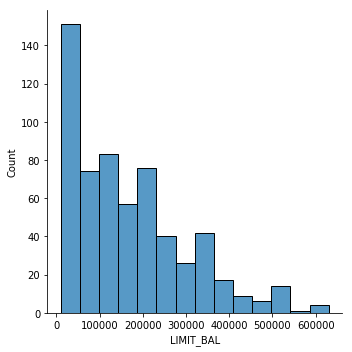

<Figure size 432x288 with 0 Axes>

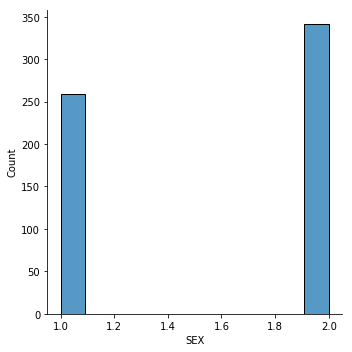

<Figure size 432x288 with 0 Axes>

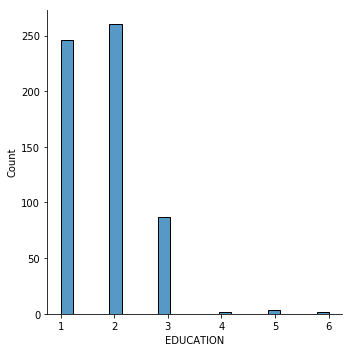

<Figure size 432x288 with 0 Axes>

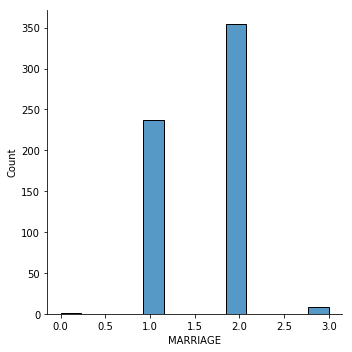

<Figure size 432x288 with 0 Axes>

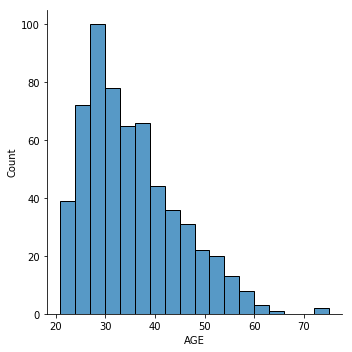

<Figure size 432x288 with 0 Axes>

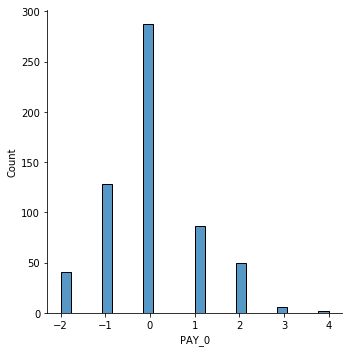

<Figure size 432x288 with 0 Axes>

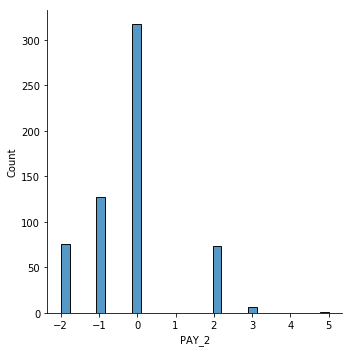

<Figure size 432x288 with 0 Axes>

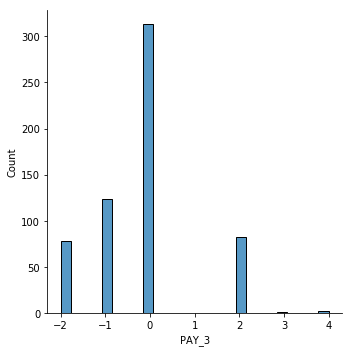

<Figure size 432x288 with 0 Axes>

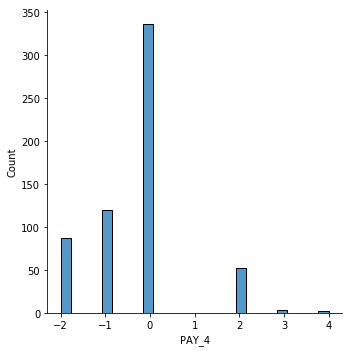

<Figure size 432x288 with 0 Axes>

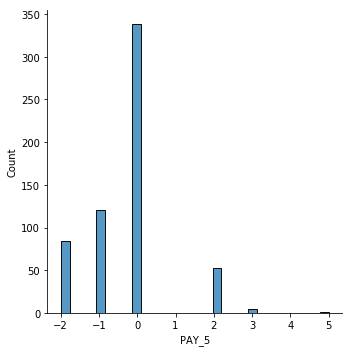

<Figure size 432x288 with 0 Axes>

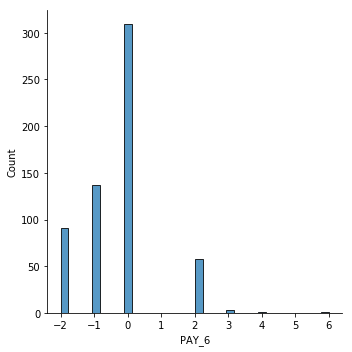

<Figure size 432x288 with 0 Axes>

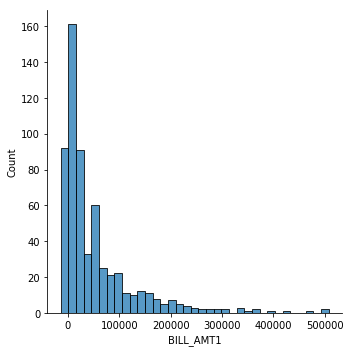

<Figure size 432x288 with 0 Axes>

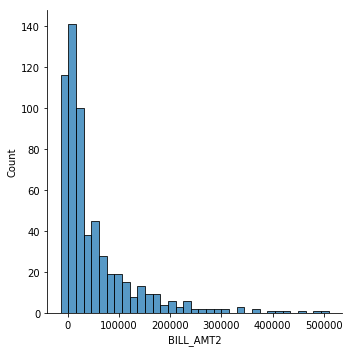

<Figure size 432x288 with 0 Axes>

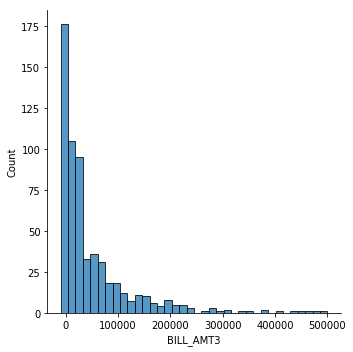

<Figure size 432x288 with 0 Axes>

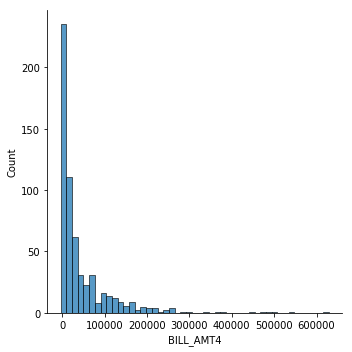

<Figure size 432x288 with 0 Axes>

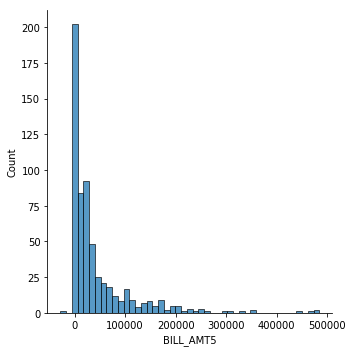

<Figure size 432x288 with 0 Axes>

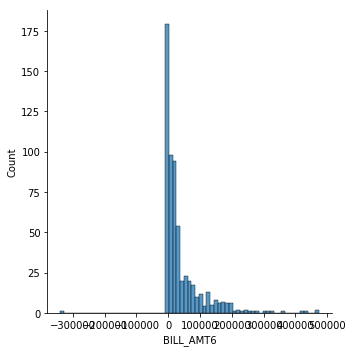

<Figure size 432x288 with 0 Axes>

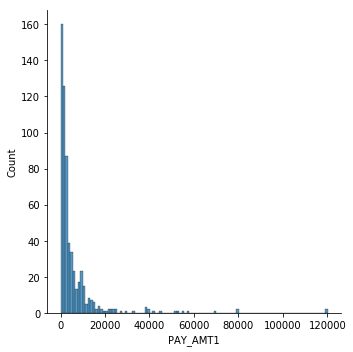

<Figure size 432x288 with 0 Axes>

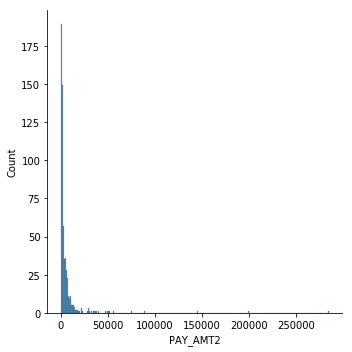

<Figure size 432x288 with 0 Axes>

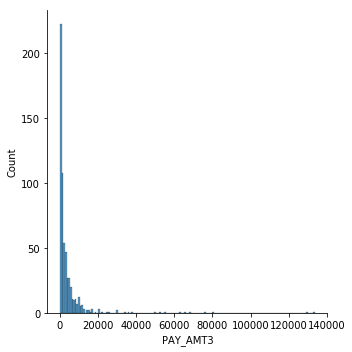

<Figure size 432x288 with 0 Axes>

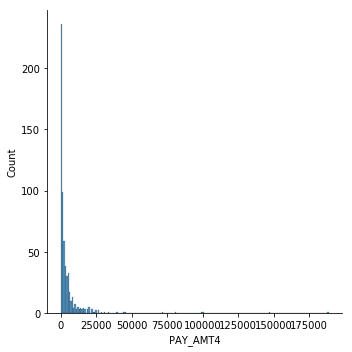

<Figure size 432x288 with 0 Axes>

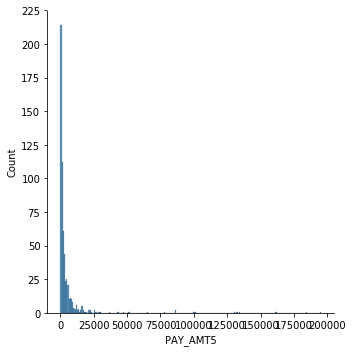

<Figure size 432x288 with 0 Axes>

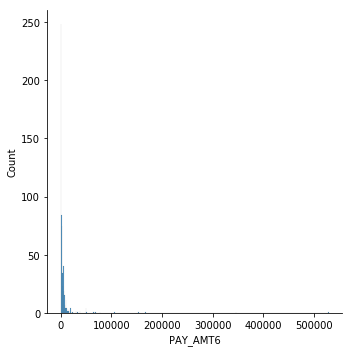

In [245]:
feature_names = list(dataset.columns)
for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.displot(dataset[feature_names[i]])

C:\Users\dimax\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\dimax\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\dimax\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

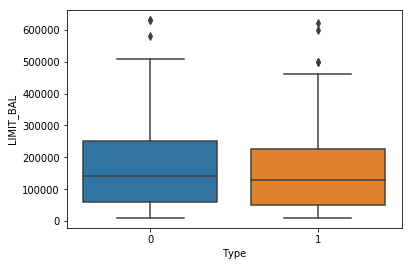

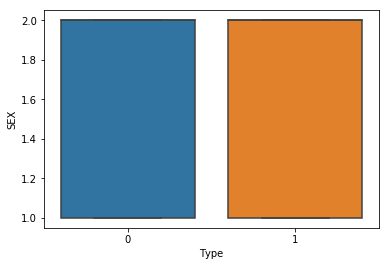

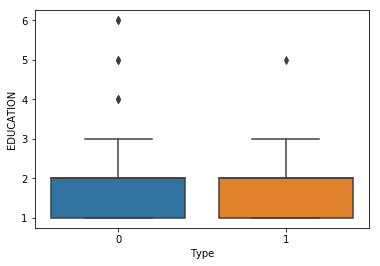

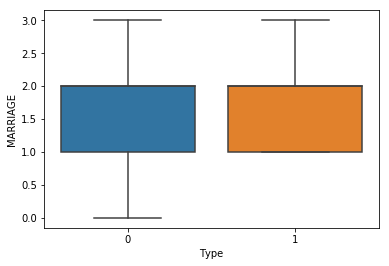

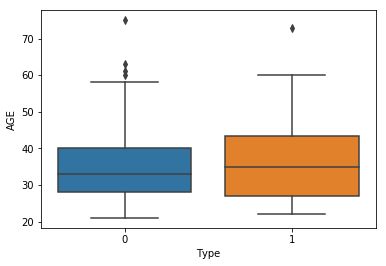

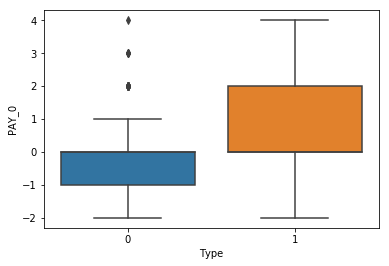

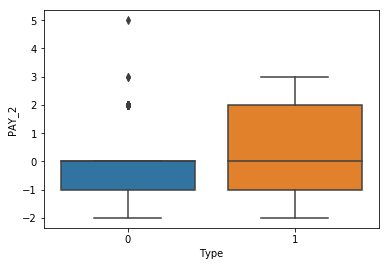

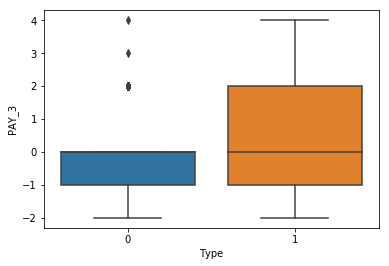

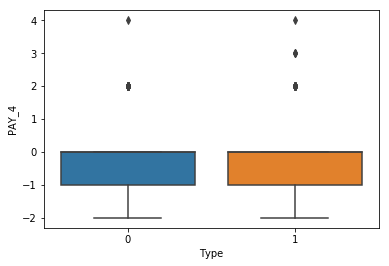

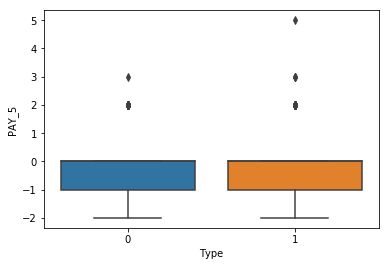

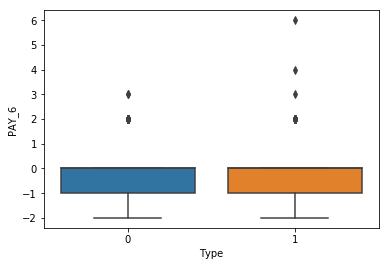

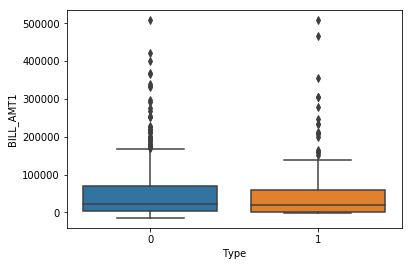

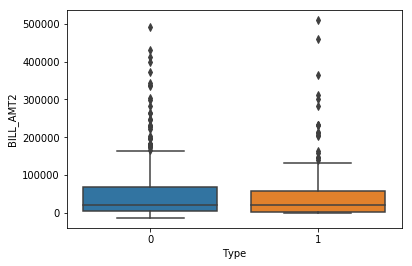

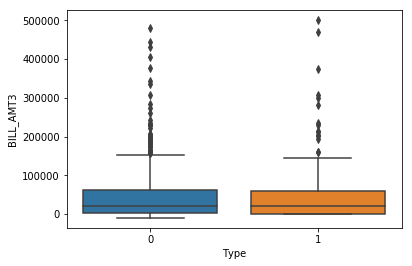

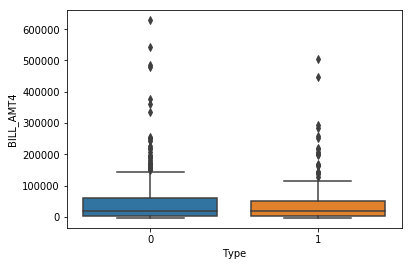

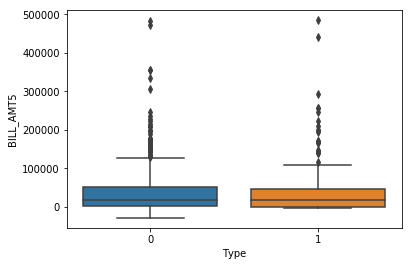

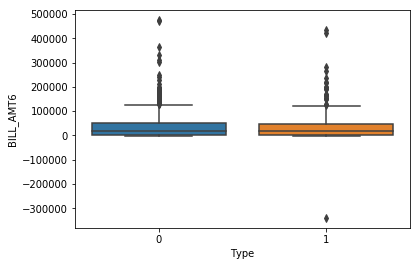

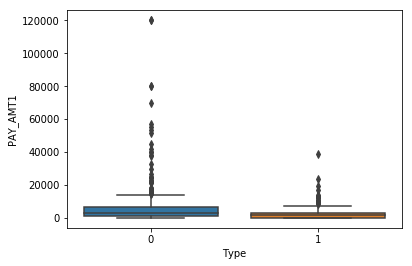

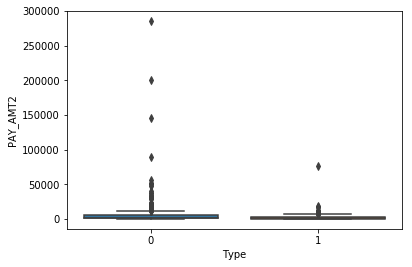

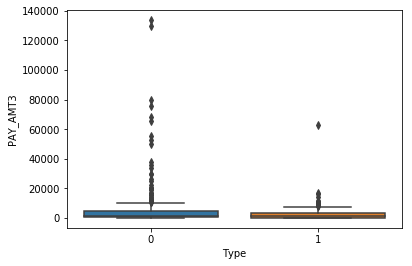

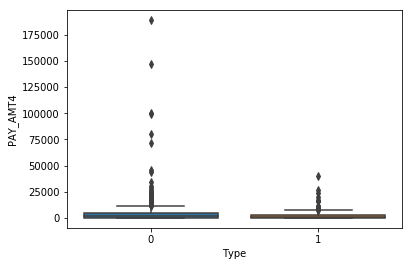

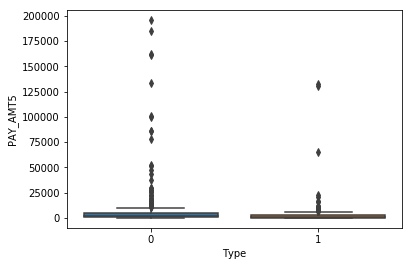

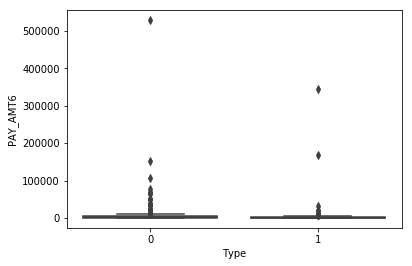

In [246]:
for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='Type', y=feature_names[i], data=dataset)

# Split the dataset into train and test 

In [247]:
X = dataset.drop('Type', axis = 1).values
y = dataset['Type'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# kNN

In [248]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [249]:
grid_params = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,10,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}
classifier_knn = GridSearchCV(knn_pipe, grid_params, cv = 3)
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())

In [250]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)
y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)
print('The grid_params combination that would give best accuracy is : ')
print(classifier_knn.best_params_)

Training set:  0.7619047619047619
Test set:  0.7944444444444444
The grid_params combination that would give best accuracy is : 
{'model__algorithm': 'brute', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__n_jobs': -1, 'model__n_neighbors': 19, 'model__p': 1, 'model__weights': 'uniform'}


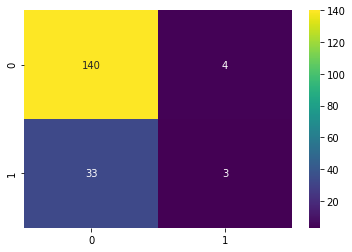

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       144
           1       0.43      0.08      0.14        36

   micro avg       0.79      0.79      0.79       180
   macro avg       0.62      0.53      0.51       180
weighted avg       0.73      0.79      0.73       180



In [251]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_knn_test))

# SVC

In [252]:
from sklearn.svm import SVC
classifier_svm = SVC()
steps = [
    ('scalar', StandardScaler()),
    ('model', SVC())
]
svm_pipe = Pipeline(steps)

In [253]:
grid_params = { 'model__kernel' : ['linear','rbf'],
               'model__C' : [1,10,100],
               'model__random_state' : [42],
               'model__gamma' : ['scale','auto']
}
classifier_svm = GridSearchCV(svm_pipe, grid_params, cv = 3)
classifier_svm = classifier_svm.fit(X_train, y_train.ravel())

In [254]:
y_pred_svm_train = classifier_svm.predict(X_train)
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
print("Training set: ", accuracy_svm_train)
y_pred_svm_test = classifier_svm.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
print("Test set: ", accuracy_svm_test)

Training set:  0.7666666666666667
Test set:  0.8


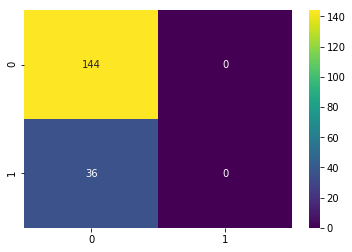

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       144
           1       0.00      0.00      0.00        36

   micro avg       0.80      0.80      0.80       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.64      0.80      0.71       180

{'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'linear', 'model__random_state': 42}


C:\Users\dimax\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dimax\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dimax\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [255]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_svm_test))
print(classifier_svm.best_params_)

# Random Forest

In [256]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier())
]
rf_pipe = Pipeline(steps)

In [257]:
grid_params =  { "model__n_estimators": [100,200,500,600],
                "model__max_features": ["auto", "sqrt"],
                "model__max_depth":[10,20],
                "model__min_samples_split": [2, 5, 10],
                "model__bootstrap": [True, False],
                "model__criterion": ["gini"],
                "model__random_state" : [42] }
            
classifier_rf = GridSearchCV(rf_pipe, grid_params,cv = 3, n_jobs = -1)
classifier_rf = classifier_rf.fit(X_train, y_train.ravel())

In [258]:
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)
y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  1.0
Test set:  0.8


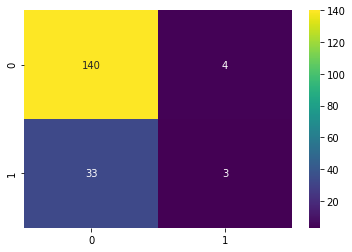

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       144
           1       0.43      0.08      0.14        36

   micro avg       0.79      0.79      0.79       180
   macro avg       0.62      0.53      0.51       180
weighted avg       0.73      0.79      0.73       180

{'model__algorithm': 'brute', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__n_jobs': -1, 'model__n_neighbors': 19, 'model__p': 1, 'model__weights': 'uniform'}


In [259]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_knn_test))
print(classifier_knn.best_params_)

# Gradient Boost

In [260]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_gb = GradientBoostingClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', GradientBoostingClassifier())
]
gb_pipe = Pipeline(steps)

In [261]:
grid_params =  { "model__n_estimators": [100,200],
                "model__loss": ['deviance', 'exponential'],
                "model__learning_rate": [0.1],
                "model__max_features": ['auto', 'sqrt'],
                "model__criterion": ['friedman_mse', 'mse', 'mae'],
                "model__random_state": [42] }
            
classifier_gb = GridSearchCV(gb_pipe, grid_params,cv = 3, n_jobs = -1)
classifier_gb = classifier_gb.fit(X_train, y_train.ravel())

In [262]:
y_pred_gb_train = classifier_gb.predict(X_train)
accuracy_gb_train = accuracy_score(y_train, y_pred_gb_train)
print("Training set: ", accuracy_gb_train)
y_pred_gb_test = classifier_gb.predict(X_test)
accuracy_gb_test = accuracy_score(y_test, y_pred_gb_test)
print("Test set: ", accuracy_gb_test)

Training set:  0.9833333333333333
Test set:  0.7611111111111111


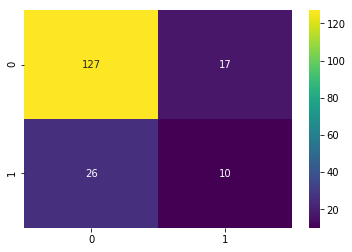

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       144
           1       0.37      0.28      0.32        36

   micro avg       0.76      0.76      0.76       180
   macro avg       0.60      0.58      0.59       180
weighted avg       0.74      0.76      0.75       180

{'model__criterion': 'friedman_mse', 'model__learning_rate': 0.1, 'model__loss': 'deviance', 'model__max_features': 'sqrt', 'model__n_estimators': 200, 'model__random_state': 42}


In [263]:
sns.heatmap(confusion_matrix(y_test, y_pred_gb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_gb_test))
print(classifier_gb.best_params_)

# AdaBoost

In [264]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ab = AdaBoostClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', AdaBoostClassifier())
]
ab_pipe = Pipeline(steps)

In [265]:
grid_params =  { "model__algorithm": [ 'SAMME.R',  'SAMME'],
                "model__learning_rate":[0.5,1,2,3],
                "model__n_estimators": [50,100,150,200,300],
                "model__random_state" : [42] }

classifier_ab = GridSearchCV(ab_pipe, grid_params,cv = 3, n_jobs = -1)
classifier_ab = classifier_ab.fit(X_train, y_train.ravel())

In [266]:
from sklearn.metrics import accuracy_score
y_pred_ab_train = classifier_ab.predict(X_train)
accuracy_ab_train = accuracy_score(y_train, y_pred_ab_train)
print("Training set: ", accuracy_ab_train)
y_pred_ab_test = classifier_ab.predict(X_test)
accuracy_ab_test = accuracy_score(y_test, y_pred_ab_test)
print("Test set: ", accuracy_ab_test)

Training set:  0.8547619047619047
Test set:  0.7777777777777778


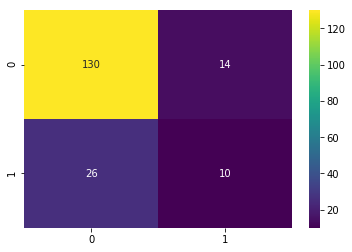

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       144
           1       0.42      0.28      0.33        36

   micro avg       0.78      0.78      0.78       180
   macro avg       0.62      0.59      0.60       180
weighted avg       0.75      0.78      0.76       180

{'model__algorithm': 'SAMME', 'model__learning_rate': 1, 'model__n_estimators': 200, 'model__random_state': 42}


In [267]:
sns.heatmap(confusion_matrix(y_test, y_pred_ab_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_ab_test))
print(classifier_ab.best_params_)

# Decision Tree

In [268]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', DecisionTreeClassifier())
]
dt_pipe = Pipeline(steps)

In [269]:
grid_params = [ { "model__max_depth": np.arange(1,21),
                 "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                 "model__min_samples_split": np.arange(2, 11),
                 "model__criterion": ["gini"],
                 "model__random_state" : [42]}
            ]
classifier_dt = GridSearchCV(dt_pipe,grid_params,cv = 3,n_jobs = -1)
classifier_dt = classifier_dt.fit(X_train, y_train.ravel())

In [270]:
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)
y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

Training set:  0.7642857142857142
Test set:  0.8


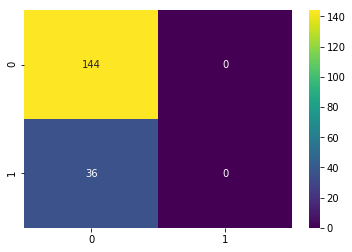

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       144
           1       0.00      0.00      0.00        36

   micro avg       0.80      0.80      0.80       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.64      0.80      0.71       180

{'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 100, 'model__min_samples_split': 2, 'model__random_state': 42}


C:\Users\dimax\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dimax\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dimax\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [271]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_dt_test))
print(classifier_dt.best_params_)

# Visualizing Decision Tree

In [272]:
classifier_dt = DecisionTreeClassifier( 
                                        criterion = 'gini', 
                                        max_depth = 9,
                                        min_samples_leaf=  1,
                                        min_samples_split = 4,
                                        random_state = 42).fit(X_train, y_train.ravel())

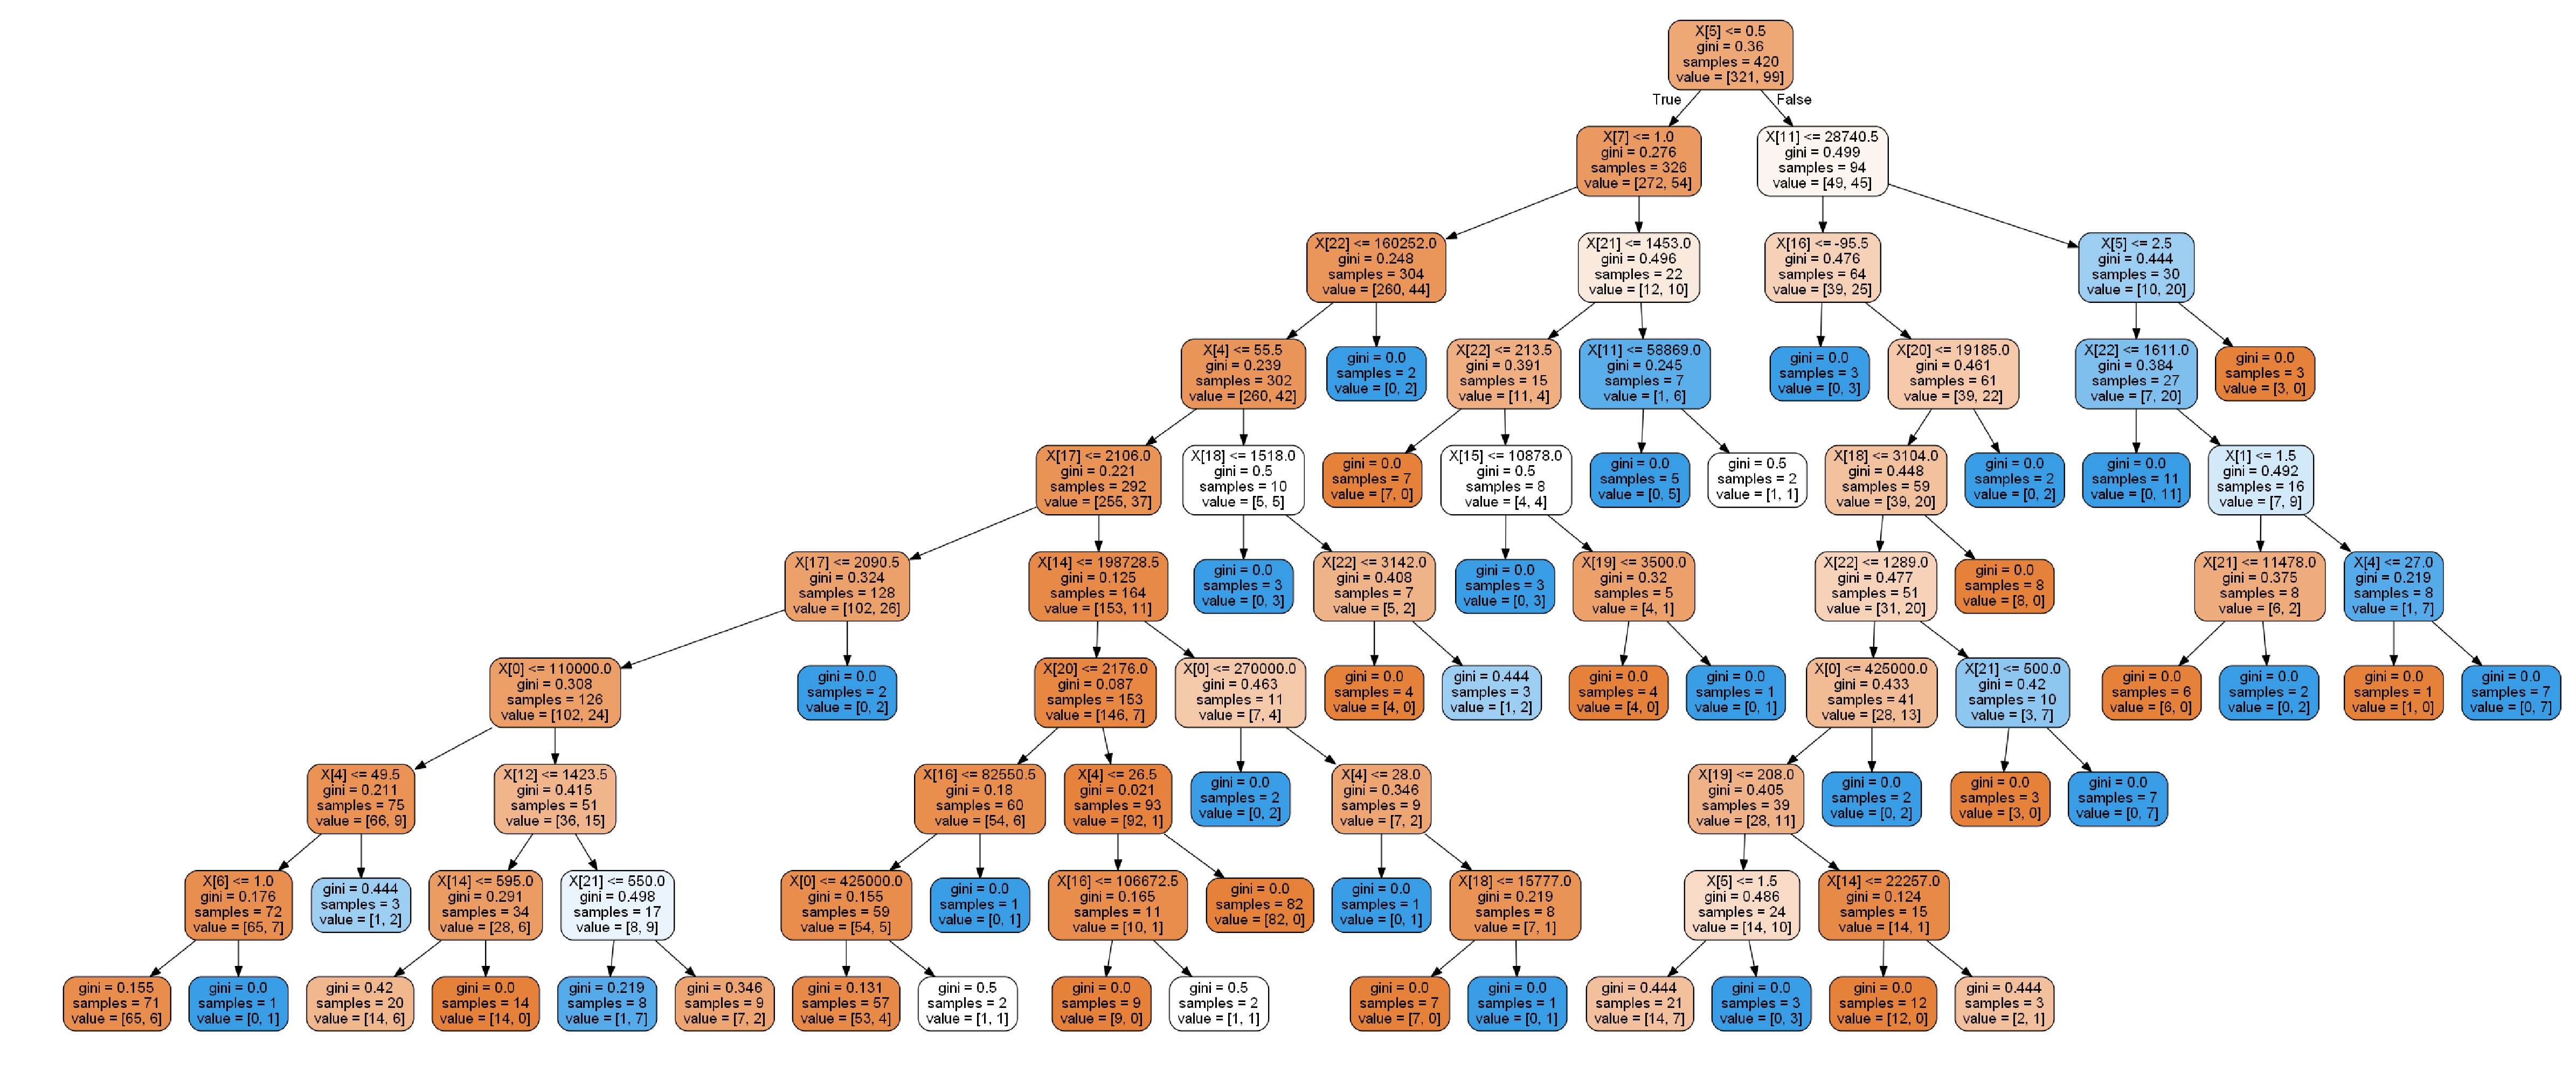

In [273]:
dot_data=export_graphviz(classifier_dt,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')    
plt.figure(num=None, figsize=(30, 30), dpi=200, facecolor='w', edgecolor='k') 
plt.axis("off")
plt.imshow(plt.imread('tree.png'))